# Artificial Neural Network

![](https://miro.medium.com/max/500/0*oGO3XjXtZ3ypq1ij)

## ANN Architecture  
![](https://miro.medium.com/max/700/1*XHCsNY7q-VO-iMb-0Wvi6w.png)

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools


In [ ]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('/content/heart.csv')

dataset.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dataset.shape

(918, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Numerical Columns 

dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# Categorical columns 
dataset.describe(exclude = 'number')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
# checking the unique values of all catogeries columns 
print(dataset['ChestPainType'].unique())
print(dataset['RestingECG'].unique())
print(dataset['ExerciseAngina'].unique())
print(dataset['ST_Slope'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


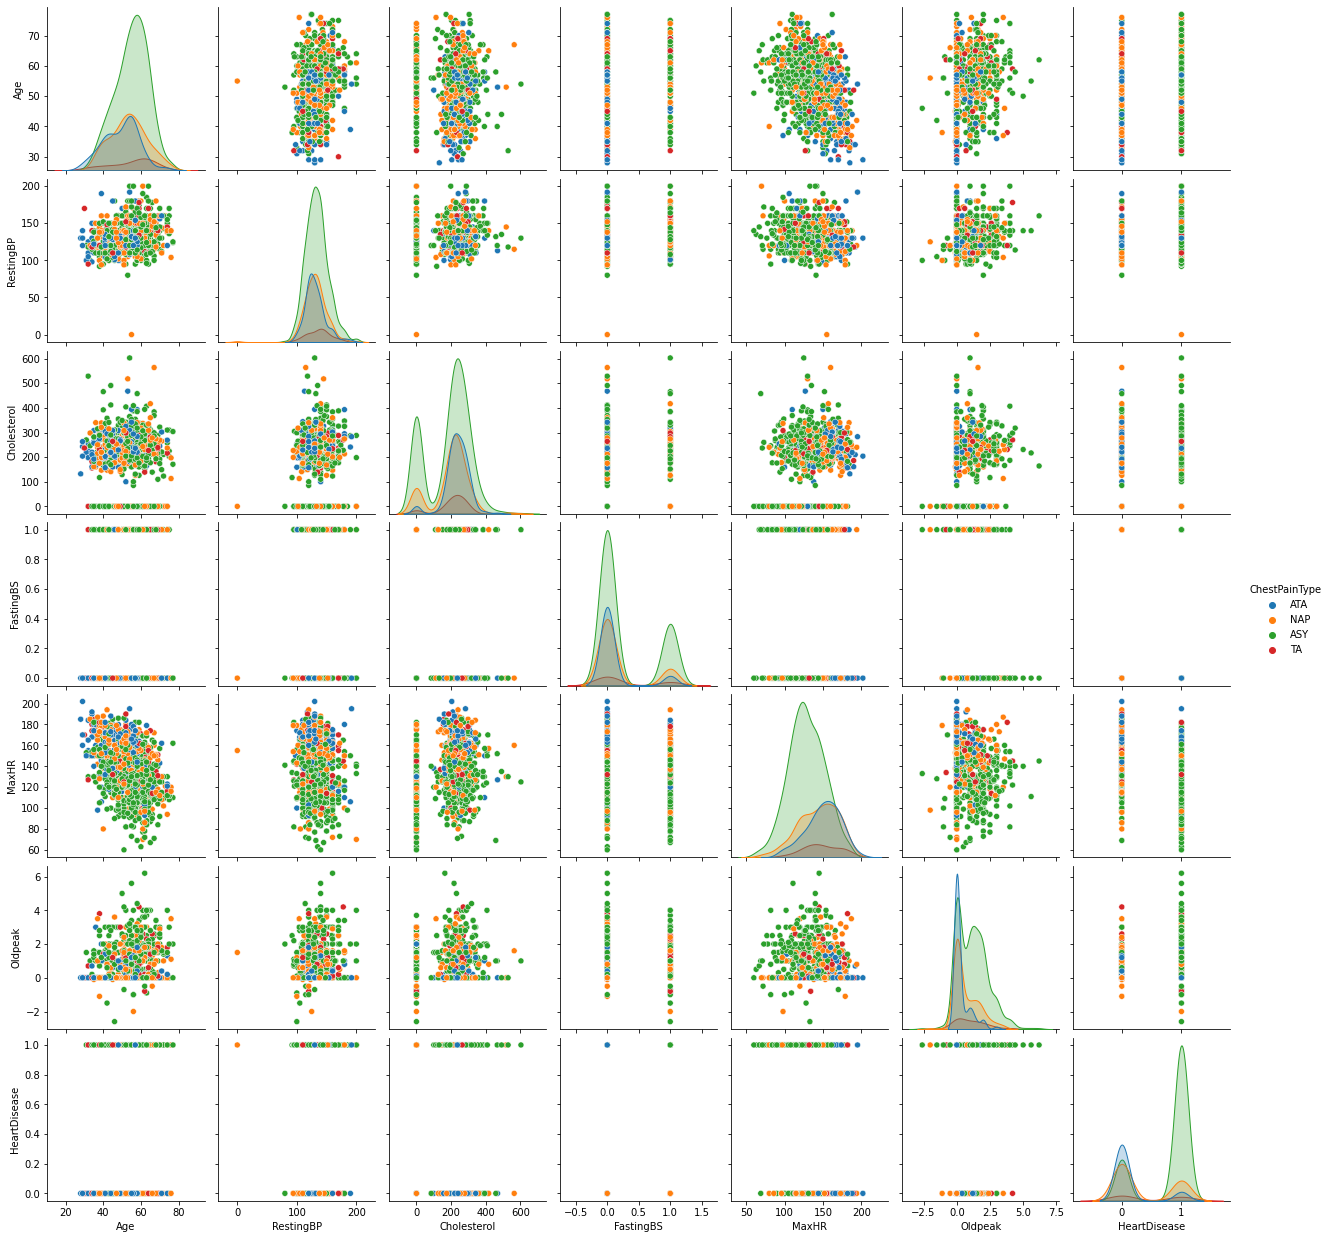

In [9]:
sns.pairplot(dataset, hue = 'ChestPainType')

In [ ]:
sns.pairplot(dataset, hue = 'FastingBS' )

In [ ]:
sns.pairplot(dataset, hue = 'Sex')

### Extracting the feature set and target 

In [10]:
# Feature set 
X = dataset.iloc[:, 0:-1]
# The target will be the last column --> do they have HeartDisease or not 
y = dataset.iloc[:, -1]

In [11]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [12]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

### Encoding categorical data

In [13]:
le = LabelEncoder()

# Label Encoding the "Sex" column
X.iloc[:,1] = le.fit_transform(X.iloc[:,1])

# Label Encoding the "ChestPainType" column
X.iloc[:,2] = le.fit_transform(X.iloc[:,2])


# Label Encoding the "RestingECG" column
X.iloc[:,6] = le.fit_transform(X.iloc[:,6])


# Label Encoding the "ExerciseAngina" column
X.iloc[:,8] = le.fit_transform(X.iloc[:,8])

# Label Encoding the "ST_Slope" column
X.iloc[:,10] = le.fit_transform(X.iloc[:,10])

In [14]:
# Sex is now 0 and 1
# Female --> 0 and Male --> 1
print(X.iloc[:,1].unique())

# ChestPainType --> 4 types 
print(X.iloc[:,2].unique())

# RestingECG --> 3 types 
print(X.iloc[:,6].unique())

# ExerciseAngina --> 2 Y or N 
print(X.iloc[:,8].unique())

# ST_Slope --> 3 types
print(X.iloc[:,10].unique())

[1 0]
[1 2 0 3]
[1 2 0]
[0 1]
[2 1 0]


In [15]:
# data after Encoding transformation 
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


### Splitting the dataset into the Training set and Test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [17]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

## Part 2 - Building the ANN

In [18]:
tf.random.set_seed(42)

### Initializing the ANN


In [63]:
ann = tf.keras.models.Sequential()
# The input layer will have the inputshape == to the features  
ann.add(tf.keras.layers.InputLayer(input_shape=(11,)))
# The 1st hidden layer will have n units and the activation function is relu
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# The 2nd hidden layer will have n units and the activation function is relu
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# The output layer has only one unit since it is binary classification --> Only 2 classes
# The activation function is the sigmoid
# in binary classification we could eithe ruse 1 or 2 units in the output layer however, I choose one.
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the ANN

In [64]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [65]:
# Note: we will use the history var to plot the model’s training history
history = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100 , validation_data = (X_test , y_test))

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 0.6821 - accuracy: 0.6403 - val_loss: 0.6729 - val_accuracy: 0.6141
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6621 - val_loss: 0.6310 - val_accuracy: 0.6522
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.6894 - val_loss: 0.5996 - val_accuracy: 0.6793
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.6975 - val_loss: 0.5955 - val_accuracy: 0.6739
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.7084 - val_loss: 0.5796 - val_accuracy: 0.7065
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7044 - val_loss: 0.5787 - val_accuracy: 0.7120
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.7112 - val_loss: 0.5820 - val_accuracy: 0.6848
Epoch 8/100


Evaluate the model with appropriate metrics

 - First experiment: 2 hidden layers, 8 units 

In [55]:
loss, accuracy = ann.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

23/23 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8542
Training Accuracy: 0.8542
Testing Accuracy:  0.8315


In [56]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 3ms/step


In [57]:
# results using the relu + 10 units in each hidden layer 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        77
           1       0.85      0.86      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



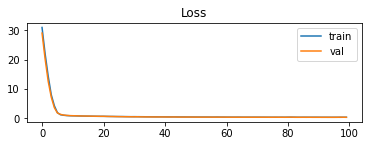

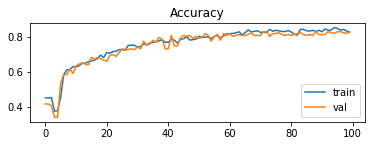

In [58]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

 - Second experiment: 2 hidden layers, 6 units 

In [48]:
loss, accuracy = ann.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

23/23 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8079
Training Accuracy: 0.8079
Testing Accuracy:  0.8098


In [49]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 2ms/step


In [50]:
# results using the relu + 6 units in each hidden layer 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        77
           1       0.85      0.82      0.83       107

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



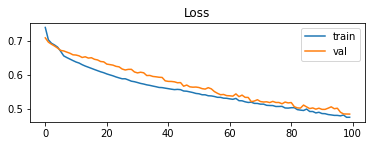

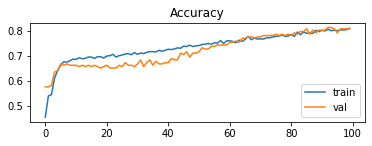

In [51]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()